<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/SVMprocesing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement SVM with Scikit-Learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



Importing the Dataset

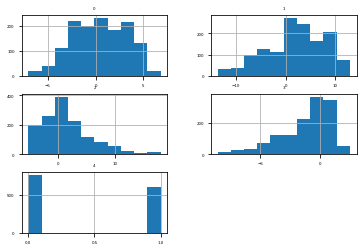

In [ ]:
dataset = pd.read_csv('drive/My Drive/Dataset/data_banknote_authentication.txt', header=None)
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the histograms
plt.show()

In [ ]:
print(dataset.shape)
print(dataset.describe)

(1372, 5)
<bound method NDFrame.describe of             0         1        2        3  4
0     3.62160   8.66610  -2.8073 -0.44699  0
1     4.54590   8.16740  -2.4586 -1.46210  0
2     3.86600  -2.63830   1.9242  0.10645  0
3     3.45660   9.52280  -4.0112 -3.59440  0
4     0.32924  -4.45520   4.5718 -0.98880  0
...       ...       ...      ...      ... ..
1367  0.40614   1.34920  -1.4501 -0.55949  1
1368 -1.38870  -4.87730   6.4774  0.34179  1
1369 -3.75030 -13.45860  17.5932 -2.77710  1
1370 -3.56370  -8.38270  12.3930 -1.28230  1
1371 -2.54190  -0.65804   2.6842  1.19520  1

[1372 rows x 5 columns]>


In [ ]:
dataset.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Data Preprocessing

In [ ]:
data = dataset.values
X, y = data[:,:-1], data[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training the alogorithm

In [10]:
from sklearn.svm import SVC
svclassifier = SVC(C=1,kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# making Prediction

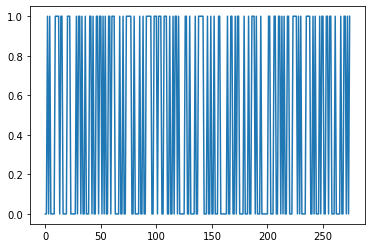

In [ ]:
y_pred = svclassifier.predict(X_test)
plt.plot(y_pred)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[153   4]
 [  1 117]]
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       157
         1.0       0.97      0.99      0.98       118

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



# Plot Decision Boudary of Classifier

In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

X_mat = np.asmatrix(X_train[:,0:2])
y_mat = np.asmatrix(y_train)
mesh_step_size = .01  # step size in the mesh
plot_symbol_size = 50
    
x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
xx1 = np.asmatrix([xx,X_train[2:4]])
#Z = svclassifier.predict(np.c_[xx1.ravel(),yy.ravel()])

In [ ]:
print(xx.shape)
print(X_mat.shape)

(2873, 1587)
(1097, 2)


In [ ]:
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y_train, cmap=cmap_bold, edgecolor = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# SVM analysis

In [ ]:
from pandas import read_csv

dataset = read_csv('drive/My Drive/InvertPhaseLong2.csv', header=0)

               850nm          640nm  ...  Channel 7  Channel 8
count   20665.000000   20665.000000  ...    20665.0    20665.0
mean   817663.068764 -777540.398306  ...        0.0        0.0
std     26649.696060   13677.458630  ...        0.0        0.0
min         0.000000 -823380.000000  ...        0.0        0.0
25%    808706.000000 -785469.000000  ...        0.0        0.0
50%    826957.000000 -773174.000000  ...        0.0        0.0
75%    834737.000000 -767922.000000  ...        0.0        0.0
max    857234.000000 -752898.000000  ...        0.0        0.0

[8 rows x 8 columns]


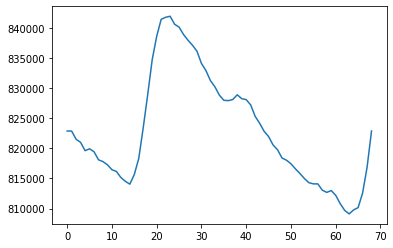

In [ ]:
from matplotlib import pyplot

print(dataset.describe())
data = dataset.values
ppg1 = data[:,0]
pyplot.plot(ppg1[1:70])
pyplot.show()

Test extract features

In [6]:
from numpy import mean, std
import numpy as np
from scipy.stats import kurtosis, skew

x = np.random.normal(0, 2, 10000)

print(mean(x))
print(std(x))
print(skew(x))
print(kurtosis(x))
print(min(x))
print(max(x))

0.015644177268206928
1.995289742229667
0.0018294517467376703
0.07942231050954751
-9.382541866096892
8.128527993117359


In [28]:
from pandas import read_csv
from pandas import DataFrame
import numpy as np

def load_data(filename):
  dataset = read_csv(filename, header=0);
  data = dataset.values;
  return data
def segment_data(signal, distance, overlap):
  i = 1;
  s = list()
  while int(i+distance)<len(signal):
    a = signal[int(i):int(i+distance)];
    #a = [x for x in t]
    #a = DataFrame.transpose(DataFrame(t))
    #a = np.split(a,int(distance-1)
    s.append(a)
    i = i + distance*overlap
    
  return np.asarray(s) # return a nd array
d = 170
data0 = load_data('drive/My Drive/Dataset/InvertPhaseLong2.csv')  
ppgl0 = segment_data(data0[70:17220,0],d,0.5)  #in-phase
ppgl1 = segment_data(data0[70:,1],d,0.5)  # in-phase 
ppgl2 = segment_data(data0[70:,2],d,0.5)  # invert-phase
ppgl3 = segment_data(data0[70:,3],d,0.5)  # in-phase

data2 = load_data('drive/My Drive/Dataset/longcunDB2.csv') 
ppg2 = segment_data(data2[70:,1],d,0.5)
ppg3 = segment_data(data2[70:,0],d,0.5) # Positive with noise

data3 = load_data('drive/My Drive/Dataset/sejanCun1.csv') 
ppgs0 = segment_data(data3[70:,0],d,0.5) # invert-phase
ppgs1 = segment_data(data3[70:,1],d,0.5) # noise
ppgs2 = segment_data(data3[1400:20200,2],d,0.5) # invert-phase
ppgs3 = segment_data(data3[70:,3],d,0.5) # noise

data4 = load_data('drive/My Drive/Dataset/longcunDB01.csv') 
ppgla0 = segment_data(data4[70:,0],d,0.5) # invert-phase
ppgla1 = segment_data(data4[70:,1],d,0.5) # noise
ppgla2 = segment_data(data4[70:,2],d,0.5) # invert-phase
ppgla3 = segment_data(data4[70:,3],d,0.5) # invert-phase

data5 = load_data('drive/My Drive/Dataset/InvertPhaseLong1.csv') 
ppglb0 = segment_data(data5[70:,0],d,0.5) # not good invert-phase
ppglb1 = segment_data(data5[70:,1],d,0.5) # in-phase
ppglb2 = segment_data(data5[70:,2],d,0.5) # invert-phase
ppglb3 = segment_data(data5[70:,3],d,0.5) # in-phase

data6 = load_data('drive/My Drive/Dataset/sejanCun2.csv') 
ppgsa0 = segment_data(data6[70:,0],d,0.5) # in-phase
ppgsa1 = segment_data(data6[70:,1],d,0.5) # noise
ppgsa2 = segment_data(data6[70:,2],d,0.5) # in-phase
ppgsa3 = segment_data(data6[70:,3],d,0.5) # noise

data7 = load_data('drive/My Drive/Dataset/sejanGuan2.csv') 
ppgsb0 = segment_data(data7[70:,0],d,0.5) # not good invert-phase
ppgsb1 = segment_data(data7[70:,1],d,0.5) # invert-phase
ppgsb2 = segment_data(data7[70:,2],d,0.5) # not good invert-phase
ppgsb3 = segment_data(data7[70:,3],d,0.5) # invert-phase

data8 = load_data('drive/My Drive/Dataset/dauChi01.csv') 
ppgd0 = segment_data(data8[70:,0],d,0.5) #  invert-phase
ppgd1 = segment_data(data8[70:,1],d,0.5) # NG invert-phase
ppgd2 = segment_data(data8[70:,2],d,0.5) #  invert-phase
ppgd3 = segment_data(data8[70:,3],d,0.5) # NG invert-phase

data9 = load_data('drive/My Drive/Dataset/dauGuan2.csv') 
ppgda0 = segment_data(data9[70:,0],d,0.5) #  in-phase
ppgda1 = segment_data(data9[70:,1],d,0.5) # noise -inphase
ppgda2 = segment_data(data9[70:,2],d,0.5) #  in-phase
ppgda3 = segment_data(data9[70:,3],d,0.5) # noise in-phase

data10 = load_data('drive/My Drive/Dataset/haiCun01.csv') 
ppgh0 = segment_data(data10[70:,0],d,0.5) #  in-phase
ppgh1 = segment_data(data10[70:,1],d,0.5) # noise -inphase
ppgh2 = segment_data(data10[70:,2],d,0.5) #  in-phase
ppgh3 = segment_data(data10[70:,3],d,0.5) # noise in-phase

data11 = load_data('drive/My Drive/Dataset/haiChi01.csv') 
ppgha0 = segment_data(data11[70:,0],d,0.5) #  noise
ppgha1 = segment_data(data11[70:,1],d,0.5) # noise 
ppgha2 = segment_data(data11[70:,2],d,0.5) #  noise 
ppgha3 = segment_data(data11[70:,3],d,0.5) # noise 

data12 = load_data('drive/My Drive/Dataset/longCun01.csv') 
ppglc0 = segment_data(data12[70:,0],d,0.5) # invert-phase
ppglc1 = segment_data(data12[70:,1],d,0.5) # invert-phase
ppglc2 = segment_data(data12[70:,2],d,0.5) # invert-phase
ppglc3 = segment_data(data12[70:,3],d,0.5) # invert-phase

data13 = load_data('drive/My Drive/Dataset/longGuan01.csv') 
ppgld0 = segment_data(data13[70:,0],d,0.5) # invert-phase
ppgld1 = segment_data(data13[70:,1],d,0.5) # in-phase
ppgld2 = segment_data(data13[70:,2],d,0.5) # invert-phase
ppgld3 = segment_data(data13[70:,3],d,0.5) # in-phase not good

data14 = load_data('drive/My Drive/Dataset/longChi01.csv') 
ppgle0 = segment_data(data14[70:,0],d,0.5) # NG invert-phase
ppgle1 = segment_data(data14[70:,1],d,0.5) # invert-phase
ppgle2 = segment_data(data14[70:,2],d,0.5) # NG invert-phase
ppgle3 = segment_data(data14[70:,3],d,0.5) # invẻt-phase 

data15 = load_data('drive/My Drive/Dataset/longChiA01.csv') 
ppglf0 = segment_data(data15[70:,0],d,0.5) # in-phase
ppglf1 = segment_data(data15[70:,1],d,0.5) # NG in-phase
ppglf2 = segment_data(data15[70:,2],d,0.5) # in-phase
ppglf3 = segment_data(data15[70:,3],d,0.5) # NG in-phase 

data16 = load_data('drive/My Drive/Dataset/longTest15.csv') 
ppglg0 = segment_data(data16[70:,0],d,0.5) # invert-phase
ppglg1 = segment_data(data16[70:,1],d,0.5) # invert-phase
ppglg2 = segment_data(data16[70:,2],d,0.5) # noise
ppglg3 = segment_data(data16[70:,3],d,0.5) # invert-phase 

s1 = np.concatenate((ppgl0, ppgl1, ppgl3, ppglb1,ppglb3, ppgsa0, ppgsa2, ppgda0, ppgda2, ppgld1, ppgld3, ppglf0, ppglf1, ppglf2, ppglf3)) # in-phase
#s2 = np.concatenate((ppgl2, ppgs0, ppgla0, ppgla2, ppgla3, ppglb2, ppgsb1, ppgsb3, ppgd0, ppgd2, ppglc0, ppglc1, ppglc2, ppgle1, ppgle3))  # invert-phase
s2 = np.concatenate(( ppgsb1, ppgsb3, ppgl2, ppgla2, ppgla3, ppglb2, ppglc0, ppglc1, ppglc2, ppgle1, ppgle3, ppglg0, ppglg1, ppglg3))  # invert-phase
s3 = np.concatenate((ppg2, ppgs1, ppgs3,ppgla1, ppgsa1, ppgsa3, ppgda1, ppgda3, ppgh0, ppgh1, ppgha0, ppgha1, ppgha2, ppgha3, ppglg2))           # noise Data

# Prepare Data

In [29]:
# label for first group of Data
y1 = [1]*s1.shape[0];
y2 = [-1]*s2.shape[0];
y3 = [0]*s3.shape[0];

y1 = np.asarray(y1)
y2 = np.asarray(y2)
y3 = np.asarray(y3)
print((y1.shape, y2.shape, y3.shape))
#ydf1 = DataFrame(y1)
#ydf2 = DataFrame(y2)
# Concatenate data
X = np.concatenate((s1, s2, s3))
y = np.concatenate((y1, y2, y3))
print(X.shape)

# rescale data
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
def scaling(signal):
  scaler = MinMaxScaler()
  s_trans = signal.transpose()
  Xscaled = scaler.fit_transform(s_trans)
  Xscaled = Xscaled.transpose()
  return Xscaled  
Xscaled = scaling(X)
Xscaled2 = scaling(ppg2)
Xscaled3 = scaling(ppg3)

((3732,), (3397,), (3626,))
(10755, 170)


# Extract features

In [30]:
"""
def feature_extraction(data):
  feats = list()
  for x in data:
     Smax = max(x)
     Smin = min(x)
     Smean = mean(x)
     Sstd = std(x)
     Sskew = skew(x)
     Skur = kurtosis(x)
     feat = [Smax, Smin, Smean, Sstd, Sskew, Skur]
     feats.append(feat)
  return feats
"""
from numpy import mean, std
import numpy as np
from scipy.stats import kurtosis, skew
def feature_extraction(data):
  feats = list()
  for x in data:
     #Smax = max(x)
     #Smin = min(x)
     Smean = mean(x)
     Sstd = std(x)
     Sskew = skew(x)
     Skur = kurtosis(x)
     feat = [Smean, Sstd, Sskew, Skur]
     feats.append(feat)
  return feats
# extrcat features
Xfeats = np.asarray(feature_extraction(Xscaled))

In [19]:
Xfeats = np.asarray(feature_extraction(Xscaled))

Xfeats[1:10],Xfeats[1000:1010]

(array([[ 0.42741247,  0.26070793,  0.27658526, -0.92386194],
        [ 0.43260155,  0.26449686,  0.50997742, -0.66209003],
        [ 0.46272424,  0.27610156,  0.2724087 , -1.06949076],
        [ 0.46342374,  0.24981164,  0.2001371 , -0.7544239 ],
        [ 0.42014847,  0.2435936 ,  0.48099445, -0.54612002],
        [ 0.41613315,  0.30184017,  0.32737517, -1.17699582],
        [ 0.48380933,  0.26650033,  0.02247591, -0.99795622],
        [ 0.45718088,  0.2459779 ,  0.3907438 , -0.69068644],
        [ 0.43764496,  0.30609553,  0.23809077, -1.26844817]]),
 array([[ 0.39558285,  0.27153727,  0.65357041, -0.65375145],
        [ 0.41751676,  0.25600281,  0.63609556, -0.45787394],
        [ 0.40549618,  0.28549378,  0.72583481, -0.636453  ],
        [ 0.42939475,  0.2596492 ,  0.64011832, -0.52572549],
        [ 0.36390966,  0.24603118,  0.80891023, -0.03825056],
        [ 0.41203505,  0.26702308,  0.62444539, -0.62436537],
        [ 0.3925291 ,  0.2611861 ,  0.65840436, -0.55932111],
      

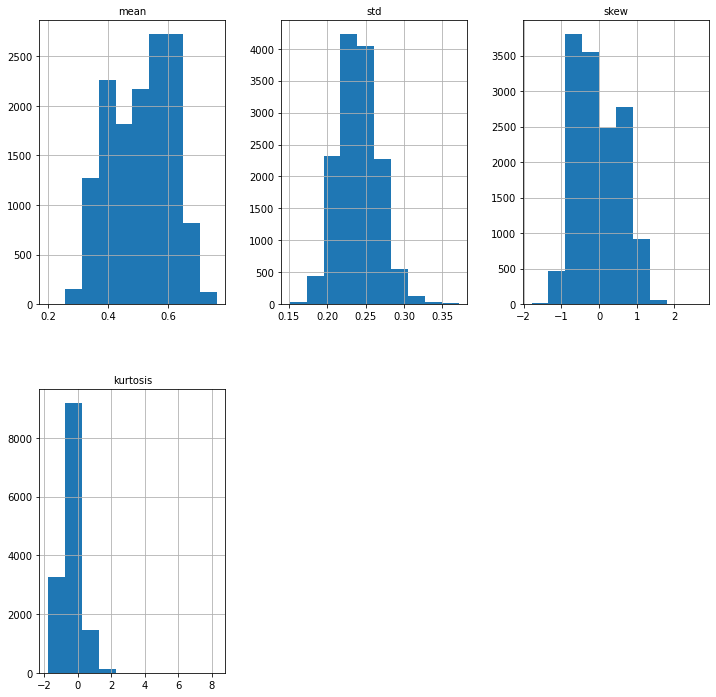

,mean,std,skew,kurtosis
count,14077.000000,14077.000000,14077.000000,14077.000000
mean,0.509605,0.240210,-0.023752,-0.387140
std,0.102561,0.026722,0.596697,0.542894
min,0.199597,0.150962,-1.793931,-1.778743
25%,0.418833,0.221432,-0.521760,-0.745587
50%,0.521606,0.239295,-0.118923,-0.456008
75%,0.595264,0.257893,0.489897,-0.110500
max,0.761315,0.371689,2.694624,8.301664


In [8]:
from pandas import DataFrame
import matplotlib.pyplot as plt

#plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
#featnames = ["max", "min","mean","std","skew","kurtosis"]
featnames = ["mean","std","skew","kurtosis"]
# show historgram of features
featset = DataFrame(Xfeats, columns= featnames)
#plt.figure(figsize=(18, 18))
fig = featset.hist(xlabelsize=10, ylabelsize=10,figsize=[12,12],layout=[2,3],)
[x.title.set_size(10) for x in fig.ravel()]

# show the histograms
#plt.suptitle("This is Figure title")
plt.show()
featset.describe()



# Data Processing

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xfeats, y, test_size=0.3, random_state=1)

Train Data

In [12]:
from sklearn.svm import SVC
svclassifier = SVC(C=1,kernel='linear',) # 'linear', 'poly', 'rbf', 'sigmoid', ‘precomputed’
svclassifier.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Confuse matrix

[[ 678  595   51]
 [ 263  958  207]
 [  16  162 1294]]
              precision    recall  f1-score   support

          -1       0.71      0.51      0.59      1324
           0       0.56      0.67      0.61      1428
           1       0.83      0.88      0.86      1472

    accuracy                           0.69      4224
   macro avg       0.70      0.69      0.69      4224
weighted avg       0.70      0.69      0.69      4224



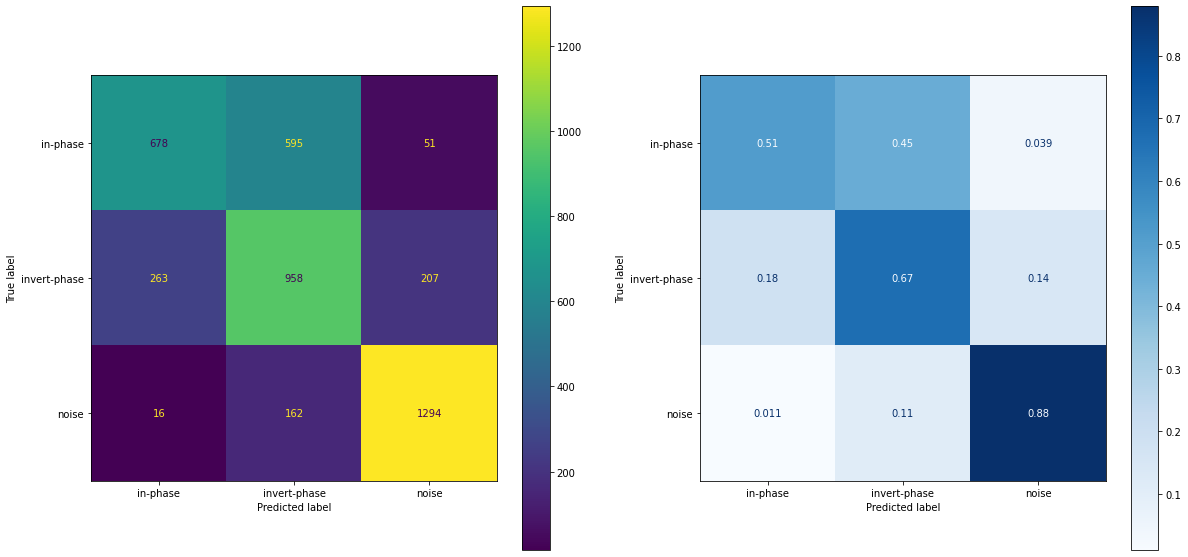

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
# making prediction
y_pred = svclassifier.predict(X_test)

# confuse matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
# plot confuse matrix
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
#_, ax = plt.subplots(figsize=(10, 10))
class_names = ["in-phase", "invert-phase","noise"]
plot_confusion_matrix(svclassifier, X_test, y_test,display_labels=class_names, values_format='d' ,
                                            ax=ax1)
#_, bx = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(svclassifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true', values_format='.2g',ax=ax2)
#plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.show()

In [11]:
svclassifier.score(X_test, y_test)

0.6976799242424242

In [12]:
report = classification_report(y_test,y_pred, output_dict=True)
print(report)
print(report['accuracy'])


{'-1': {'precision': 0.7010816125860374, 'recall': 0.5385196374622356, 'f1-score': 0.609141392567279, 'support': 1324}, '0': {'precision': 0.5659241420830825, 'recall': 0.6582633053221288, 'f1-score': 0.608611201035934, 'support': 1428}, '1': {'precision': 0.8369987063389392, 'recall': 0.8790760869565217, 'f1-score': 0.8575215374420146, 'support': 1472}, 'accuracy': 0.6976799242424242, 'macro avg': {'precision': 0.7013348203360197, 'recall': 0.6919530099136288, 'f1-score': 0.6917580436817424, 'support': 4224}, 'weighted avg': {'precision': 0.70275422009694, 'recall': 0.6976799242424242, 'f1-score': 0.6955188688335788, 'support': 4224}}
0.6976799242424242


# Evaluating the Model

Param=0.10: 66.935% (+/-0.000)
Param=0.30: 67.958% (+/-0.000)
Param=0.50: 68.423% (+/-0.000)
Param=0.70: 69.166% (+/-0.000)
Param=0.90: 69.507% (+/-0.000)
Param=1.00: 69.569% (+/-0.000)
Param=3.00: 69.972% (+/-0.000)
Param=5.00: 70.158% (+/-0.000)
Param=7.00: 70.189% (+/-0.000)
Param=10.00: 70.096% (+/-0.000)
Param=100.00: 70.034% (+/-0.000)
Param=1000.00: 70.003% (+/-0.000)
Param=10000.00: 69.972% (+/-0.000)
Param=0.10: 67.927% (+/-0.000)
Param=0.30: 70.127% (+/-0.000)
Param=0.50: 71.645% (+/-0.000)
Param=0.70: 72.172% (+/-0.000)
Param=0.90: 72.792% (+/-0.000)
Param=1.00: 72.947% (+/-0.000)
Param=3.00: 74.682% (+/-0.000)
Param=5.00: 75.085% (+/-0.000)
Param=7.00: 75.426% (+/-0.000)
Param=10.00: 75.674% (+/-0.000)
Param=100.00: 76.108% (+/-0.000)
Param=1000.00: 76.077% (+/-0.000)
Param=10000.00: 76.170% (+/-0.000)
Param=0.10: 68.609% (+/-0.000)
Param=0.30: 69.786% (+/-0.000)
Param=0.50: 70.840% (+/-0.000)
Param=0.70: 71.769% (+/-0.000)
Param=0.90: 72.575% (+/-0.000)
Param=1.00: 73.040%

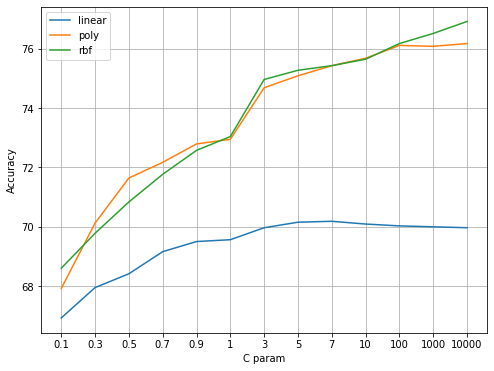

In [32]:

# fit and evaluate the model
def evaluate_model(trainX, trainy, testX, testy, n_Cs='1', n_kernels='rbf',n_gammas='scale'):
  svclassifier = SVC(C=n_Cs,kernel=n_kernels,gamma=n_gammas) # 'linear', 'poly', 'rbf', 'sigmoid', ‘precomputed’ 
  svclassifier.fit(X_train, y_train)
  y_pred = svclassifier.predict(X_test)
  report = classification_report(y_test,y_pred, output_dict=True)
  accuracy = report['accuracy']
  return accuracy

# summarize scores
#def summarize_results(scores, params, kernels):
def summarize_results(models, params, kernels):
  #pyplot.figure(figsize=(6,4))
  fig, ax = plt.subplots(figsize=(8,6))
  colors = ['b','c','g','r']
  for j in range(len(models)):
    scores = models[j]
  #print(scores, params)
  # summarize mean and standard deviation
    for i in range(len(scores)):
      m, s = mean(scores[i]), std(scores[i])
      print('Param=%.2f: %.3f%% (+/-%.3f)' % (params[i], m, s))
	  # boxplot of scores
    
    #pyplot.boxplot(scores, labels=params)
    s_params = [str(x) for x in params]
    ax.plot(s_params, scores)
    #ax.plot(s_params, scores, color=colors[j])
  ax.legend(kernels)
  ax.xaxis.set_label_text('C param')
  ax.yaxis.set_label_text('Accuracy')
  ax.grid(True)
  plt.savefig('exp_svm_C_Kernels.png')

#
def run_experiment(params, repeats=10, kernel = 'linear'):
	# load data
	#X_train, y_train, X_test, y_test = load_dataset()
	# test each parameter
  all_scores = list()
  for p in params:
  # repeat experiment
    scores = list()
    for r in range(repeats):
			#score = evaluate_model(X_train, y_train, X_test, y_test, n_Cs=p)
      score = evaluate_model(X_train, y_train, X_test, y_test, n_Cs=p, n_kernels= kernel ) #n_gammas= p
      score = score * 100.0
			#print('>p=%d #%d: %.3f' % (p, r+1, score))
      scores.append(score)
    all_scores.append(scores)
	
  # summarize results
  #summarize_results(all_scores, params, n_kernels)
  return all_scores

def run_model(kernels, params, repeats=1):
	# load data
	#X_train, y_train, X_test, y_test = load_dataset()
	# test each parameter
  models = list()
  for k in kernels:
		# repeat experiment
    scores = run_experiment(params = params, repeats = repeats, kernel = k)
		# summarize results
    models.append(scores)
  summarize_results(models, params, kernels = kernels)
  return models 
# parameter
#n_params = [0.1, 0.3, 0.5, 0.7, 0.9, 1, 3, 5, 7, 10, 20]
n_params = [0.1, 0.3, 0.5, 0.7, 0.9, 1, 3, 5, 7, 10, 100, 1000, 10000]
#n_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
n_kernels = ['linear', 'poly', 'rbf']
model = run_model(kernels = n_kernels, params= n_params)

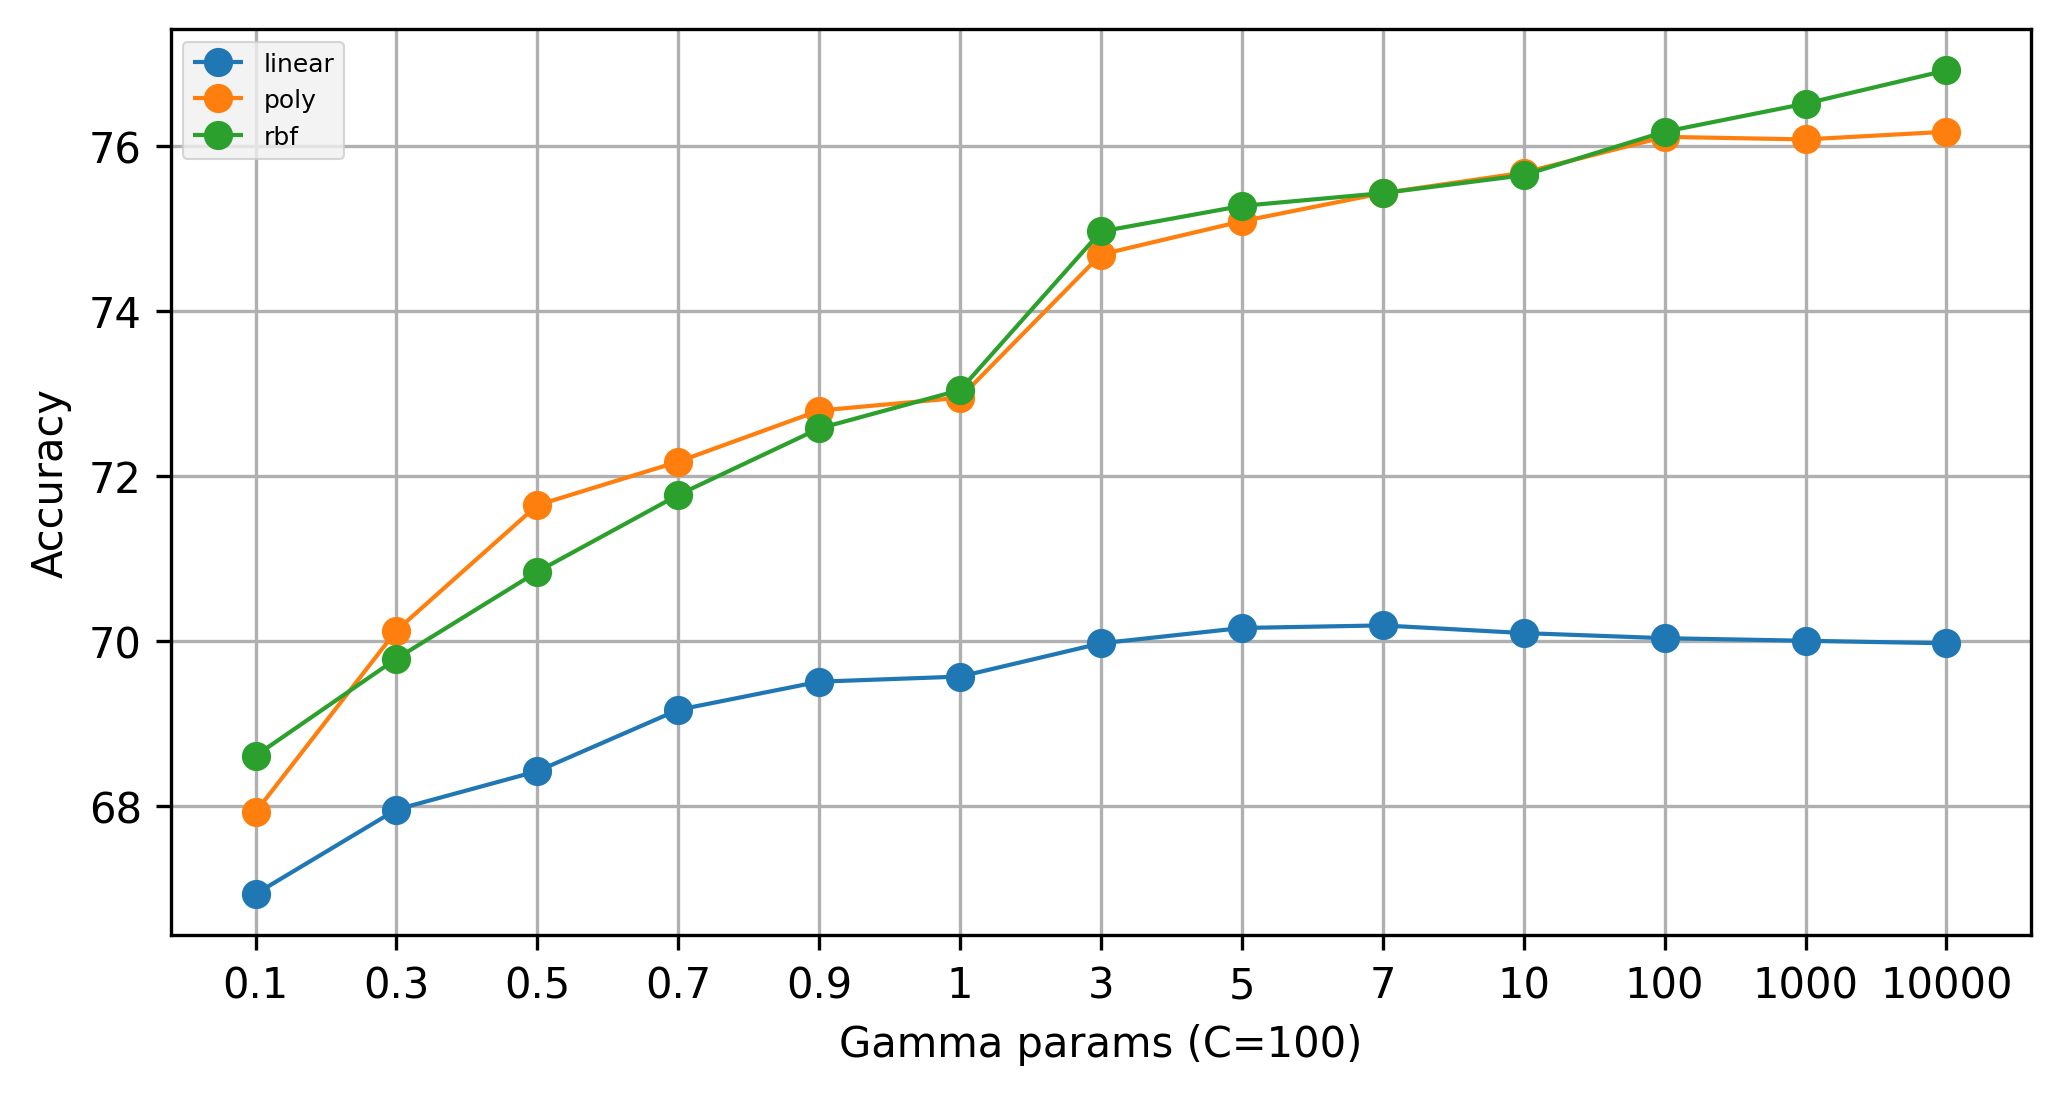

In [33]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
from cycler import cycler

def summarize_results(models, params, kernels):
  #pyplot.figure()
  #_, ax = plt.subplots(figsize=(8,6))
  fig = plt.figure(figsize=(8,4),dpi=300)
  ax = fig.add_subplot(111)
  #colors = ['b','c','g','r']
  
  val = [1,5,7,8]
  styles = []
  values = range(10)
  jet = cm = plt.get_cmap('jet') 
  cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
  scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
  # style
  plt.style.use('fivethirtyeight')#'fivethirtyeight'
 
  # create a color palette
  #palette = plt.get_cmap('Set2')
  ccolors = ['#1f77b4',
          '#ff7f0e',
          '#2ca02c',
          '#d62728',
          '#9467bd',
          '#8c564b',
          '#e377c2',
          '#7f7f7f',
          '#bcbd22',
          '#17becf',
          '#1a55FF']
  num=0
  mpl.rcParams['axes.prop_cycle'] = cycler( color=ccolors)
  for j in range(len(models)):
    scores = models[j]
    mean_scores = []#list()
    #num+=1
    colorVal = scalarMap.to_rgba(val[j])
    for i in range(len(scores)):
      m = mean(scores[i])
      mean_scores.append(m)
    s_params = [str(x) for x in params]
    #ax.plot(s_params, scores)
    
    ax.plot(s_params, mean_scores,marker='o', linewidth=1.0) #color=colors[j] color=palette(num) colorVal
  ax.legend(kernels,loc=2, prop={'size': 6})
  
  ax.xaxis.set_label_text('Gamma params (C=100)')
  ax.yaxis.set_label_text('Accuracy')
  
  for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    #tick.label.set_rotation('vertical')
  ax.grid(True)
  plt.show()
  #pyplot.savefig('exp_svm_C_Kernels.png',dpi=600)

summarize_results(models=model, params=n_params, kernels=n_kernels)

In [ ]:
model[1][0]